## Clase 02 - Operaciones entre señales

Entre señales es posible realizar diversas operaciones, que permiten obtener información, obtener nuevas señales o transformarlas. Recordemos que para una señal continua o discreta, se podía hacer [escalamiento y desplazamiento en el tiempo  cambio](https://colab.research.google.com/drive/1ILNOKvafhqQX7DuyjIyomHG3zL9cThcJ). Adicionalmente, es posible realizar operaciones de:

- Cambio en amplitud y frecuencia.
- Suma y resta.
- Multiplicación y división.
- Modulación de amplitud.
- Modulación de frecuencia.
- Filtrado.
- Aplicacion de transformadas (Fourier) entre otras técnicas.
- Detección y eliminación de ruido.
- Generación de nuevas señales.

## Librerías de procesamiento de audio

Para poder verificar algunas de las operaciones mencionadas utilizaremos señales de audio. El procesamiento de señales de audio en Python puede realizarse mediante 3 librerías principales: SciPy, PyDub y Librosa. Las 3 son herramientas útiles para trabajar con archivos de audio en Python, sin embargo su enfoque es diferente.

### SciPy (https://scipy.org/)

Esta biblioteca ofrece herramientas más amplias de procesamiento de señales, no solo para audio, sino para imágenes, analítica de datos, entre otras tareas. En cuanto a procesamiento de audio, permite realizar transformadas, filtrado, entre otras.

### PyDub (https://pypi.org/project/pydub/#description)

Su enfoque es la manipulación de archivos de audio. Se pueden desarrollar tareas de edición, conversión y mezclado de pistas, así como para desarrollar operaciones sencillas de procesamiento de audio.

### Librosa (https://librosa.org/doc/latest/index.html)

Es un paquete para uso con música y análisis de audio. Permite analizar y procesar señales de audio, proporcionando diversas herramientas para actividades de extracción de características, transformación de audio y visualización. *(En el momento esta librería no es compatible con Python 3.11)*

In [122]:
# CLASE 02 - OPERACIONES ENTRE SEÑALES
# Cargar las librerías requeridas para procesar el audio usando SciPy

# SciPy para analizar el archivo de audio
import scipy.io.wavfile as wav

# NumPy para operar sobre el arreglo de datos
import numpy as np

# MatPlotLib para visualizar el gráfico
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10, 5]

# IPython.display para reproducir audio directamente en el notebook
from IPython.display import Audio

## Visualización de una señal de audio con SciPy

En el siguiente ejemplo se hace la carga de un archivo wav para ser visualizado en matplotlib. La función wav.read() toma un archivo .wav (ubicado en la carpeta del proyecto), retornando la frecuencia de muestreo (samplerate) y los datos (data).

La longitud de la señal se toma a partir de la propiedad *shape* del arreglo de datos (para la primera fila 0). La cantidad de datos, dividido entre la frecuencia de muestreo retornará la longitud (en tiempo) de la forma de onda a visualizar.

La función linspace de NumPy toma el invervalo desde un valor inicial (0.) hasta un valor final (length - tiempo total de la señal) y lo divide de forma equitativa para la cantidad de datos a visualizar (data.shape\[0\]).

Es importante tener en cuenta que esta señal ya ha pasado por los procesos de muestreado y cuantización vistos en la clase anterior (por lo tanto se trabaja como un arreglo de datos en el tiempo).

In [126]:
# Reproducir los audios a cargar
Audio("files/261870__technicalgeezer__static.wav")

44100 Hz
[[    0     1]
 [ 2498  3430]
 [  712  3647]
 ...
 [ -609 -1411]
 [ -290 -1711]
 [  222 -1574]]


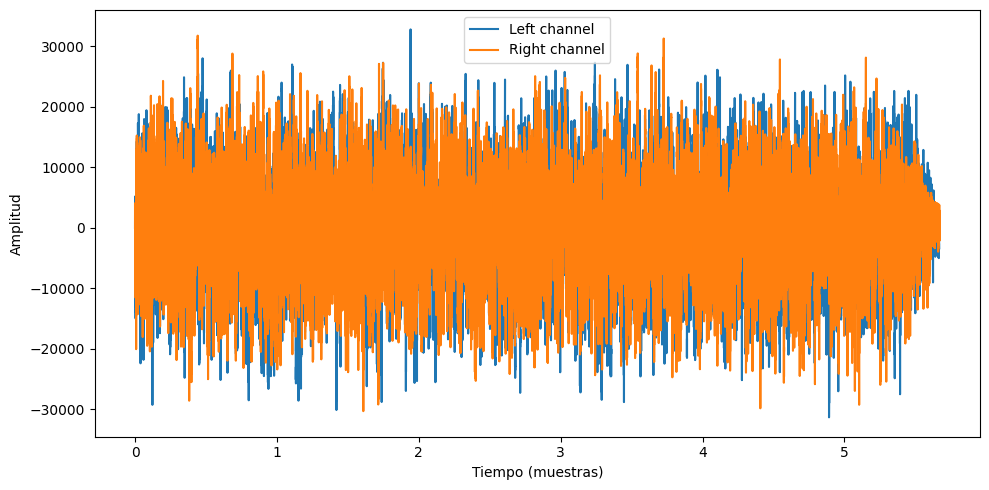

In [130]:
# Cargar el primer archivo de audio
samplerate1, data1 = wav.read("files/261870__technicalgeezer__static.wav")
print(samplerate1, "Hz") # Imprimir la frecuencia de muestreo de la primera señal
print(data1)

# Calcula la longitud (en tiempo) de la señal
length1 = data1.shape[0] / samplerate1

#La variable independiente time1 se tomará en el rango [0, length1] y se graficará según el número de muestras en el audio1.
time1 = np.linspace(0., length1, data1.shape[0])

# Visualizar la forma de onda
plt.plot(time1, data1[:, 0], label="Left channel")
plt.plot(time1, data1[:, 1], label="Right channel")
plt.legend()
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.show()

## Separación por canales de una señal

Si el archivo que se carga está en formato estéreo (dos canales), estos pueden ser separados para poder pintarlos en gráficos diferentes.

En este caso, se lee la señal de la misma manera y se crean dos variables (llamadas en el ejemplo *left* y *right*), para tomar cada uno de los canales (0 y 1).

Posteriormente se crean dos subplots que permitirán visualizar cada canal por aparte.

In [127]:
# Reproducir los audios a cargar
Audio("files/567781__rentless__hi-tones-random.wav")

44100 Hz


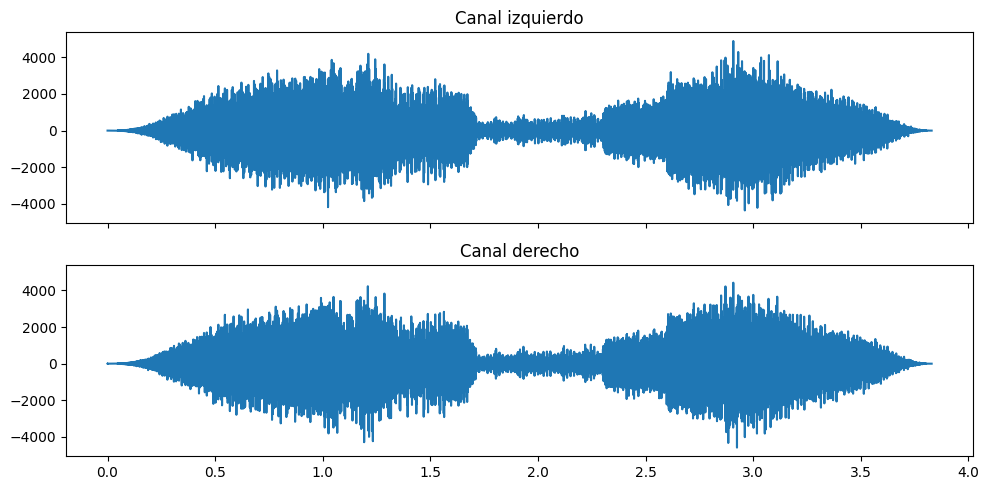

In [131]:
# Cargar el segundo archivo de audio 
samplerate2, data2 = wav.read("files/567781__rentless__hi-tones-random.wav")
print(samplerate2, "Hz") # Imprimir la frecuencia de muestreo de la primera señal

# Separar los canales
left2 = data2[:, 0]
right2 = data2[:, 1]

# Calcula la longitud (en tiempo) de la señal
length2 = data2.shape[0] / samplerate2

#La variable independiente time2 se tomará en el rango [0, length2] y se graficará según el número de muestras en el audio1.
time2 = np.linspace(0., length2, data2.shape[0])

# Crear dos subplots
fig, (ax_left, ax_right) = plt.subplots(nrows=2, sharex=True, sharey=True)

# Dibujar la señal del canal izquierdo en el primer subplot
ax_left.plot(time2, left2)
ax_left.set(title='Canal izquierdo')

# Dibujar la señal del canal derecho en el segundo subplot
ax_right.plot(time2, right2)
ax_right.set(title='Canal derecho')

# Mostrar los gráficos
plt.show()

## Operaciones sobre señales de audio

Dado que se cuenta con dos señales de audio, es posible realizar las operaciones listadas previamente sobre estas señales como forma de aplicación.

### Cambio en longitud (Zero padding)

Dado que ambas señales no tienen la misma longitud, es necesario igualarlas para poder realizar algunas operaciones sobre ellas. Es así como la señal más pequeña se rellena de ceros, generando dos arreglos de igual longitud. Este cambio puede realizarse al principio o al final de la señal.

250128 muestras
168865 muestras
5.671836734693877 segundos


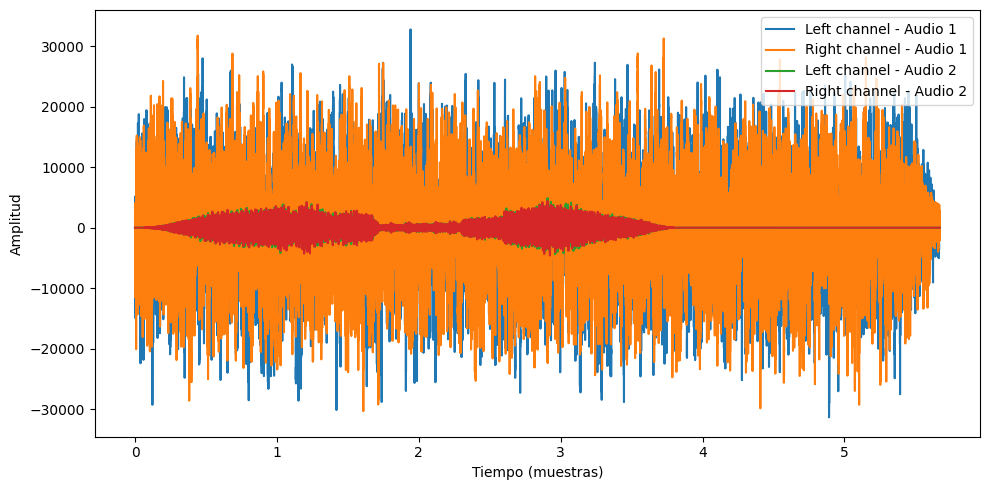

In [132]:
#Como el canal 1 no se había separado, se procede a hacerlo
left1 = data1[:, 0]
right1 = data1[:, 1]

# Para visualizar las señales en una misma gráfica, es necesario que ambas señales tengan la misma longitud
# Primero se obtiene la longitud máxima de las señales

# Imprimir la longitud del audio 1 (en cantidad de muestras)
print(len(left1), "muestras")

# Imprimir la longitud del audio 2 (en cantidad de muestras)
print(len(left2), "muestras")

max_len = max(len(left1), len(left2))

# Se define una función sencilla para realizar alineación con ceros de las dos señales
def return_padded(max_l, signal):
    return np.pad(signal, (0, max_l - len(signal)), mode='constant')

# Se usa la función para que todas las señales tengan la misma longitud
left1 = return_padded(max_len, left1)
right1 = return_padded(max_len, right1)
left2 = return_padded(max_len, left2)
right2 = return_padded(max_len, right2)

# Dado que ambas frecuencias de muestreo son iguales y la cantidad de datos fue igualada
# Calcula la longitud (en tiempo) de la señal
length = max_len / samplerate1
print(length, "segundos")

#La variable independiente time se tomará en el rango [0, length] y se graficará según el número de muestras en el audio1.
time = np.linspace(0., length, max_len)

# Visualizar la forma de onda
plt.plot(time, left1, label="Left channel - Audio 1")
plt.plot(time, right1, label="Right channel - Audio 1")
plt.plot(time, left2, label="Left channel - Audio 2")
plt.plot(time, right2, label="Right channel - Audio 2")
plt.legend(loc='best')
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.show()

### Cambio en amplitud

En la gráfica se puede ver que una de las señales tiene mayor amplitud que la otra, vamos a cambiar la amplitud de ambas señales y a graficarlas nuevamente. El proceso de cambio en amplitud consiste en multiplicar todos los componentes de la señal por un factor de escala.

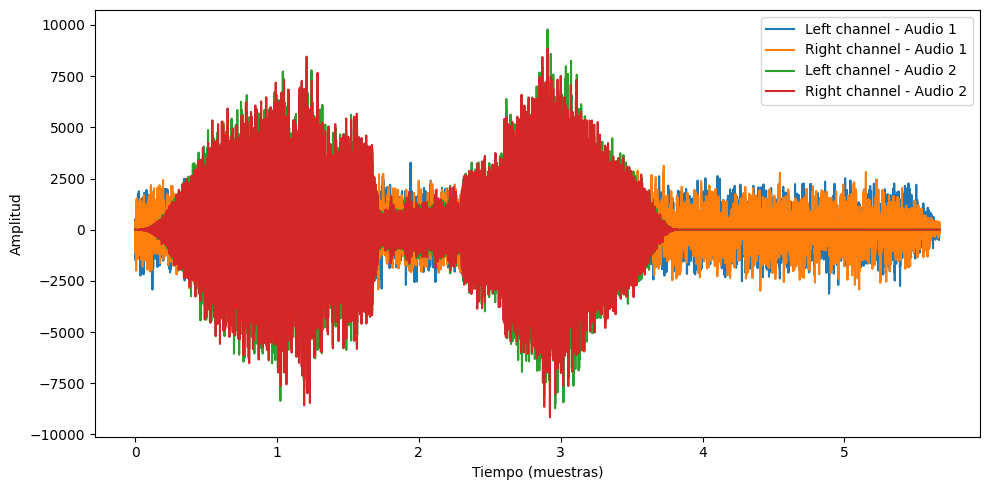

In [134]:
# Definir el factor de escalamiento en amplitud para disminuir el volumen de la señal
factor1 = 0.1

# Multiplicar la señal por dicho factor de escala:
left1_scaled = left1 * factor1
right1_scaled = right1 * factor1

# Definir el factor de escalamiento en amplitud para aumentar el volumen de la señal
factor2 = 2

# Multiplicar la señal por dicho factor de escala:
left2_scaled = left2 * factor2
right2_scaled = right2 * factor2

# Visualizar la forma de onda
plt.plot(time, left1_scaled, label="Left channel - Audio 1")
plt.plot(time, right1_scaled, label="Right channel - Audio 1")
plt.plot(time, left2_scaled, label="Left channel - Audio 2")
plt.plot(time, right2_scaled, label="Right channel - Audio 2")
plt.legend()
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.show()

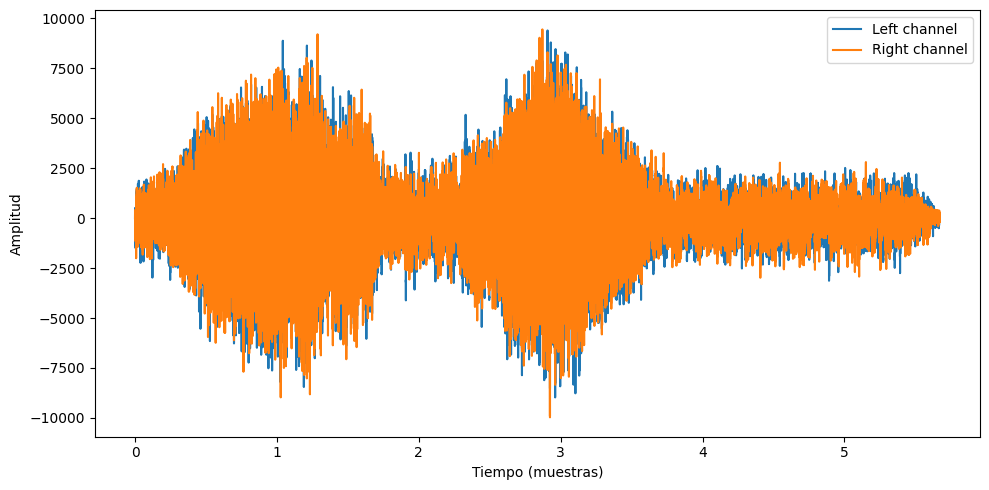

In [151]:
# Se suman los datos de dos arreglos

sum_left = left1_scaled + left2_scaled
sum_right = right1_scaled + right2_scaled

# Visualizar la forma de onda
plt.plot(time, sum_left, label="Left channel")
plt.plot(time, sum_right, label="Right channel")
plt.legend()
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.show()

In [158]:
# Es necesario reconstruir la señal WAV convirtiendo los arreglos fila a columna
sum_left_col = np.reshape(sum_left,(-1,1))
sum_right_col = np.reshape(sum_right,(-1,1))

# Posteriormente se concatenan en un arreglo de dos columnas (de la forma como venía originalmente el archivo)
sum_audio = np.concatenate((sum_left_col, sum_right_col), axis=1)
print(sum_audio.astype(np.int16))

# Escribir la señal resultante en un archivo de audio
wav.write('files/sum_output.wav', samplerate1, sum_audio.astype(np.int16))

[[   0    2]
 [ 249  343]
 [  71  364]
 ...
 [ -60 -141]
 [ -29 -171]
 [  22 -157]]


In [159]:
from IPython.display import Audio

#Reproducir el resultado
Audio("files/sum_output.wav")

## Inversión de la señal

Se desea invertir el tiempo de la señal $x(t) = x(-t)$. En este caso se usa la función flip de NumPy, que retorna el arreglo invertido.

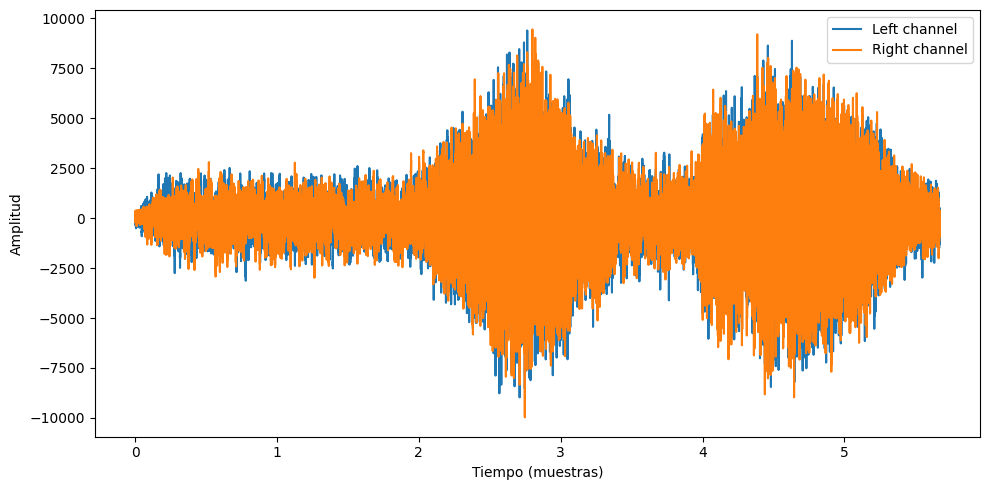

In [160]:
sum_left_inv = np.flip(sum_left, axis=None)
sum_right_inv = np.flip(sum_right, axis=None)

# Visualizar la forma de onda
plt.plot(time, sum_left_inv, label="Left channel")
plt.plot(time, sum_right_inv, label="Right channel")
plt.legend()
plt.xlabel('Tiempo (muestras)')
plt.ylabel('Amplitud')
plt.show()

In [162]:
# Generar nuevamente la señal WAV
sum_left_col = np.reshape(sum_left_inv,(-1,1))
sum_right_col = np.reshape(sum_right_inv,(-1,1))
sum_audio = np.concatenate((sum_left_col, sum_right_col), axis=1)
print(sum_audio.astype(np.int16))

# Escribir la señal resultante en un archivo de audio
wav.write('files/sum_output_flipped.wav', samplerate1, sum_audio.astype(np.int16))

[[  22 -157]
 [ -29 -171]
 [ -60 -141]
 ...
 [  71  364]
 [ 249  343]
 [   0    2]]


In [163]:
from IPython.display import Audio

#Reproducir el resultado
Audio("files/sum_output_flipped.wav")